#MOUNTING

In [ ]:
#Mouting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd '/content/drive/MyDrive/'
%cd '/content/drive/MyDrive/DSLSummer2023'
!pwd

/content/drive/MyDrive/DSLSummer2023
/content/drive/MyDrive/DSLSummer2023


#UNZIPPING


In [ ]:
# Unzipping the dataset zip file
!unzip "summer_project_dataset.zip"


In [ ]:
!pip install rfpimp

#LOADING DEVELOPMENT DATASET

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from rfpimp import *

In [ ]:
#Loading the dataset- DEVELOPMENT DATASET
dev_path = "/content/drive/MyDrive/DSLSummer2023/development.csv"
dev = pd.read_csv(dev_path)
print("Number of recors:", len(dev))
dev.head(5)

Number of recors: 31715


,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


In [ ]:
#Information on features - DEVELOPMENT DATASET
dev.info()

#DATA PREPROCESSING

Checking for **missing values** and **duplicate values**

* Data Cleaning
* Feature Engineering

In [ ]:

word_features = ['n_tokens_title',
                 'n_tokens_content',
                 'n_unique_tokens',
                 'n_non_stop_words',
                 'n_non_stop_unique_tokens',
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday']

channel_features = ['data_channel']

timedelta = ['timedelta']

ids = ['id']

others = ['url']

target = ['shares']


keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max',
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']



subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']



## *** LEFT DATAFRAME AFTER DROPPING SOME FEATURES
# Create a list of columns to drop


# THIS IS WORLED REALLY WELL WITH THE RESULT OF RMSE: 5975.204

columns_to_drop = ['id','url','n_unique_tokens', 'n_non_stop_unique_tokens',
                    'n_non_stop_words', 'average_token_length','kw_max_min',
                   'self_reference_max_shares','global_sentiment_polarity',
                   'avg_positive_polarity','min_negative_polarity',
                   'title_subjectivity','abs_title_sentiment_polarity']


# THIS IS WORLED REALLY WELL WITH THE RESULT OF RMSE: 5975.207
# columns_to_drop = ['id','url','average_token_length','kw_max_min','kw_avg_min','n_non_stop_unique_tokens',
#                    'avg_positive_polarity','min_negative_polarity','avg_negative_polarity']


# columns_to_drop = ['id','url','timedelta','n_tokens_title',
#                  'n_tokens_content','n_unique_tokens','n_non_stop_words',
#                  'n_non_stop_unique_tokens',  'average_token_length','num_self_hrefs',
#                    'kw_min_min','kw_min_max','kw_max_max',
#                    'LDA_00', 'LDA_01', 'LDA_02','LDA_04',
#                    'global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words',
#                    'rate_positive_words','rate_negative_words','min_positive_polarity', 'max_positive_polarity',
#                    'avg_negative_polarity', 'min_negative_polarity','max_negative_polarity',
#                    'title_sentiment_polarity','abs_title_sentiment_polarity']

# columns_to_drop = ['id','url','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
#                    'average_token_length',
#                    'LDA_01', 'LDA_02','LDA_04',
#                    'rate_positive_words','avg_negative_polarity', 'min_negative_polarity','max_negative_polarity']


# columns_to_drop = ['id','url','n_unique_tokens','kw_min_min','title_subjectivity',
#                      'global_sentiment_polarity']


# columns_to_drop = ['id','url','avg_negative_polarity','global_rate_positive_words','abs_title_subjectivity',
#                     'rate_positive_words','rate_negative_words','min_positive_polarity','max_negative_polarity']



# Drop the columns from the DataFrame inplace
dev.drop(columns_to_drop, axis=1, inplace=True)


dev.head(5)

In [ ]:
# Dataset with shares (label) column - DEVELOPMENT DATASET'S SHAPE
dev.shape

#After applying the duplicates function,
# we have realized that there is no any duplicates in our development dataset

(31715, 37)

In [ ]:
#There is NAN values in some features
dev.isnull().values.any()

True

In [ ]:
dev.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                      6375
num_videos                    6331
num_keywords                  6318
kw_min_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_avg_sharess       0
LDA_00                           0
LDA_01                           0
LDA_02                           0
LDA_03                           0
LDA_04                           0
global_subjectivity              0
global_rate_positive_words       0
global_rate_negative_words       0
rate_positive_words              0
rate_negative_words              0
min_positive_polarit

In [ ]:
dev = dev.ffill()

In [ ]:
# Forward fill missing values (fill with the previous non-missing value)
dev.isna().sum()
dev.head(5)

# Fill missing values with the mean of each column
# df_filled = df.fillna(df.mean())

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,shares,data_channel,weekday
0,121.0,12.0,1015.0,10.0,6.0,33.0,1.0,4.0,-1.0,110.500000,...,0.176471,0.100000,0.8,-0.160714,-0.071429,0.00,0.5,2900,bus,tuesday
1,532.0,9.0,503.0,9.0,0.0,33.0,1.0,10.0,4.0,524.750000,...,0.370370,0.136364,1.0,-0.157500,-0.100000,0.00,0.5,1300,tech,thursday
2,435.0,9.0,232.0,12.0,3.0,4.0,1.0,6.0,4.0,198.666667,...,0.714286,0.375000,0.5,-0.427500,-0.187500,0.00,0.5,17700,lifestyle,wednesday
3,134.0,12.0,171.0,9.0,5.0,0.0,1.0,6.0,-1.0,444.166667,...,0.714286,0.500000,0.5,-0.216667,-0.166667,-0.25,0.1,1500,bus,wednesday
4,728.0,11.0,286.0,5.0,2.0,0.0,0.0,6.0,217.0,356.200000,...,0.411765,0.100000,0.6,-0.251786,-0.100000,-0.10,0.3,1400,tech,thursday


In [ ]:
#After handling with missing values ()
dev.isnull().sum()

In [ ]:
dev.describe()

,id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.00000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,25340.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,15857.00000,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.533899,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,9155.47623,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,8.355645,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,0.00000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,7928.50000,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,15857.00000,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,23785.50000,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,4.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,31714.00000,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      25340 non-null  float64
 11  num_videos                    25384 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

In [ ]:
# Fetch the counts # of shares for each data_channel class
share_counts = dev.groupby('data_channel').size().reset_index()
share_counts.columns = ['data_channel','No of shares']
share_counts

In [ ]:
share_counts['No of shares'].sum()

31715

#Exploratory Analysis For Online News Popularity

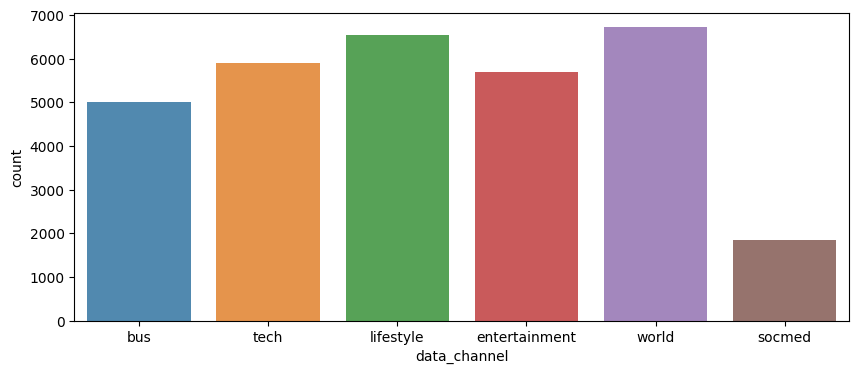

In [ ]:
# Evaluating features (shares) contribution towards the label

fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='data_channel',data=dev,alpha=0.85)
plt.savefig('shares distribution.png')

In [ ]:
# Fetch the counts # of shares for each data_channel class
share_counts_weekday = dev.groupby('weekday').size().reset_index()
share_counts_weekday.columns = ['weekday','No of shares']
share_counts_weekday

,weekday,No of shares
0,friday,4617
1,monday,5314
2,saturday,1981
3,sunday,2188
4,thursday,5824
5,tuesday,5873
6,wednesday,5918


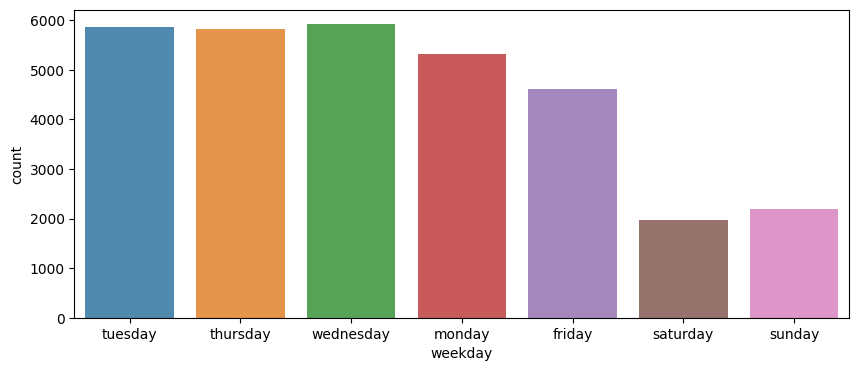

In [ ]:
# Evaluating features (shares) contribution towards the label

fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='weekday',data=dev,alpha=0.85)
plt.savefig('shares distribution over weekdays.png')

<ipython-input-23-6a2fc4776444>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= dev.corr().round(2) #get 2 decimal points


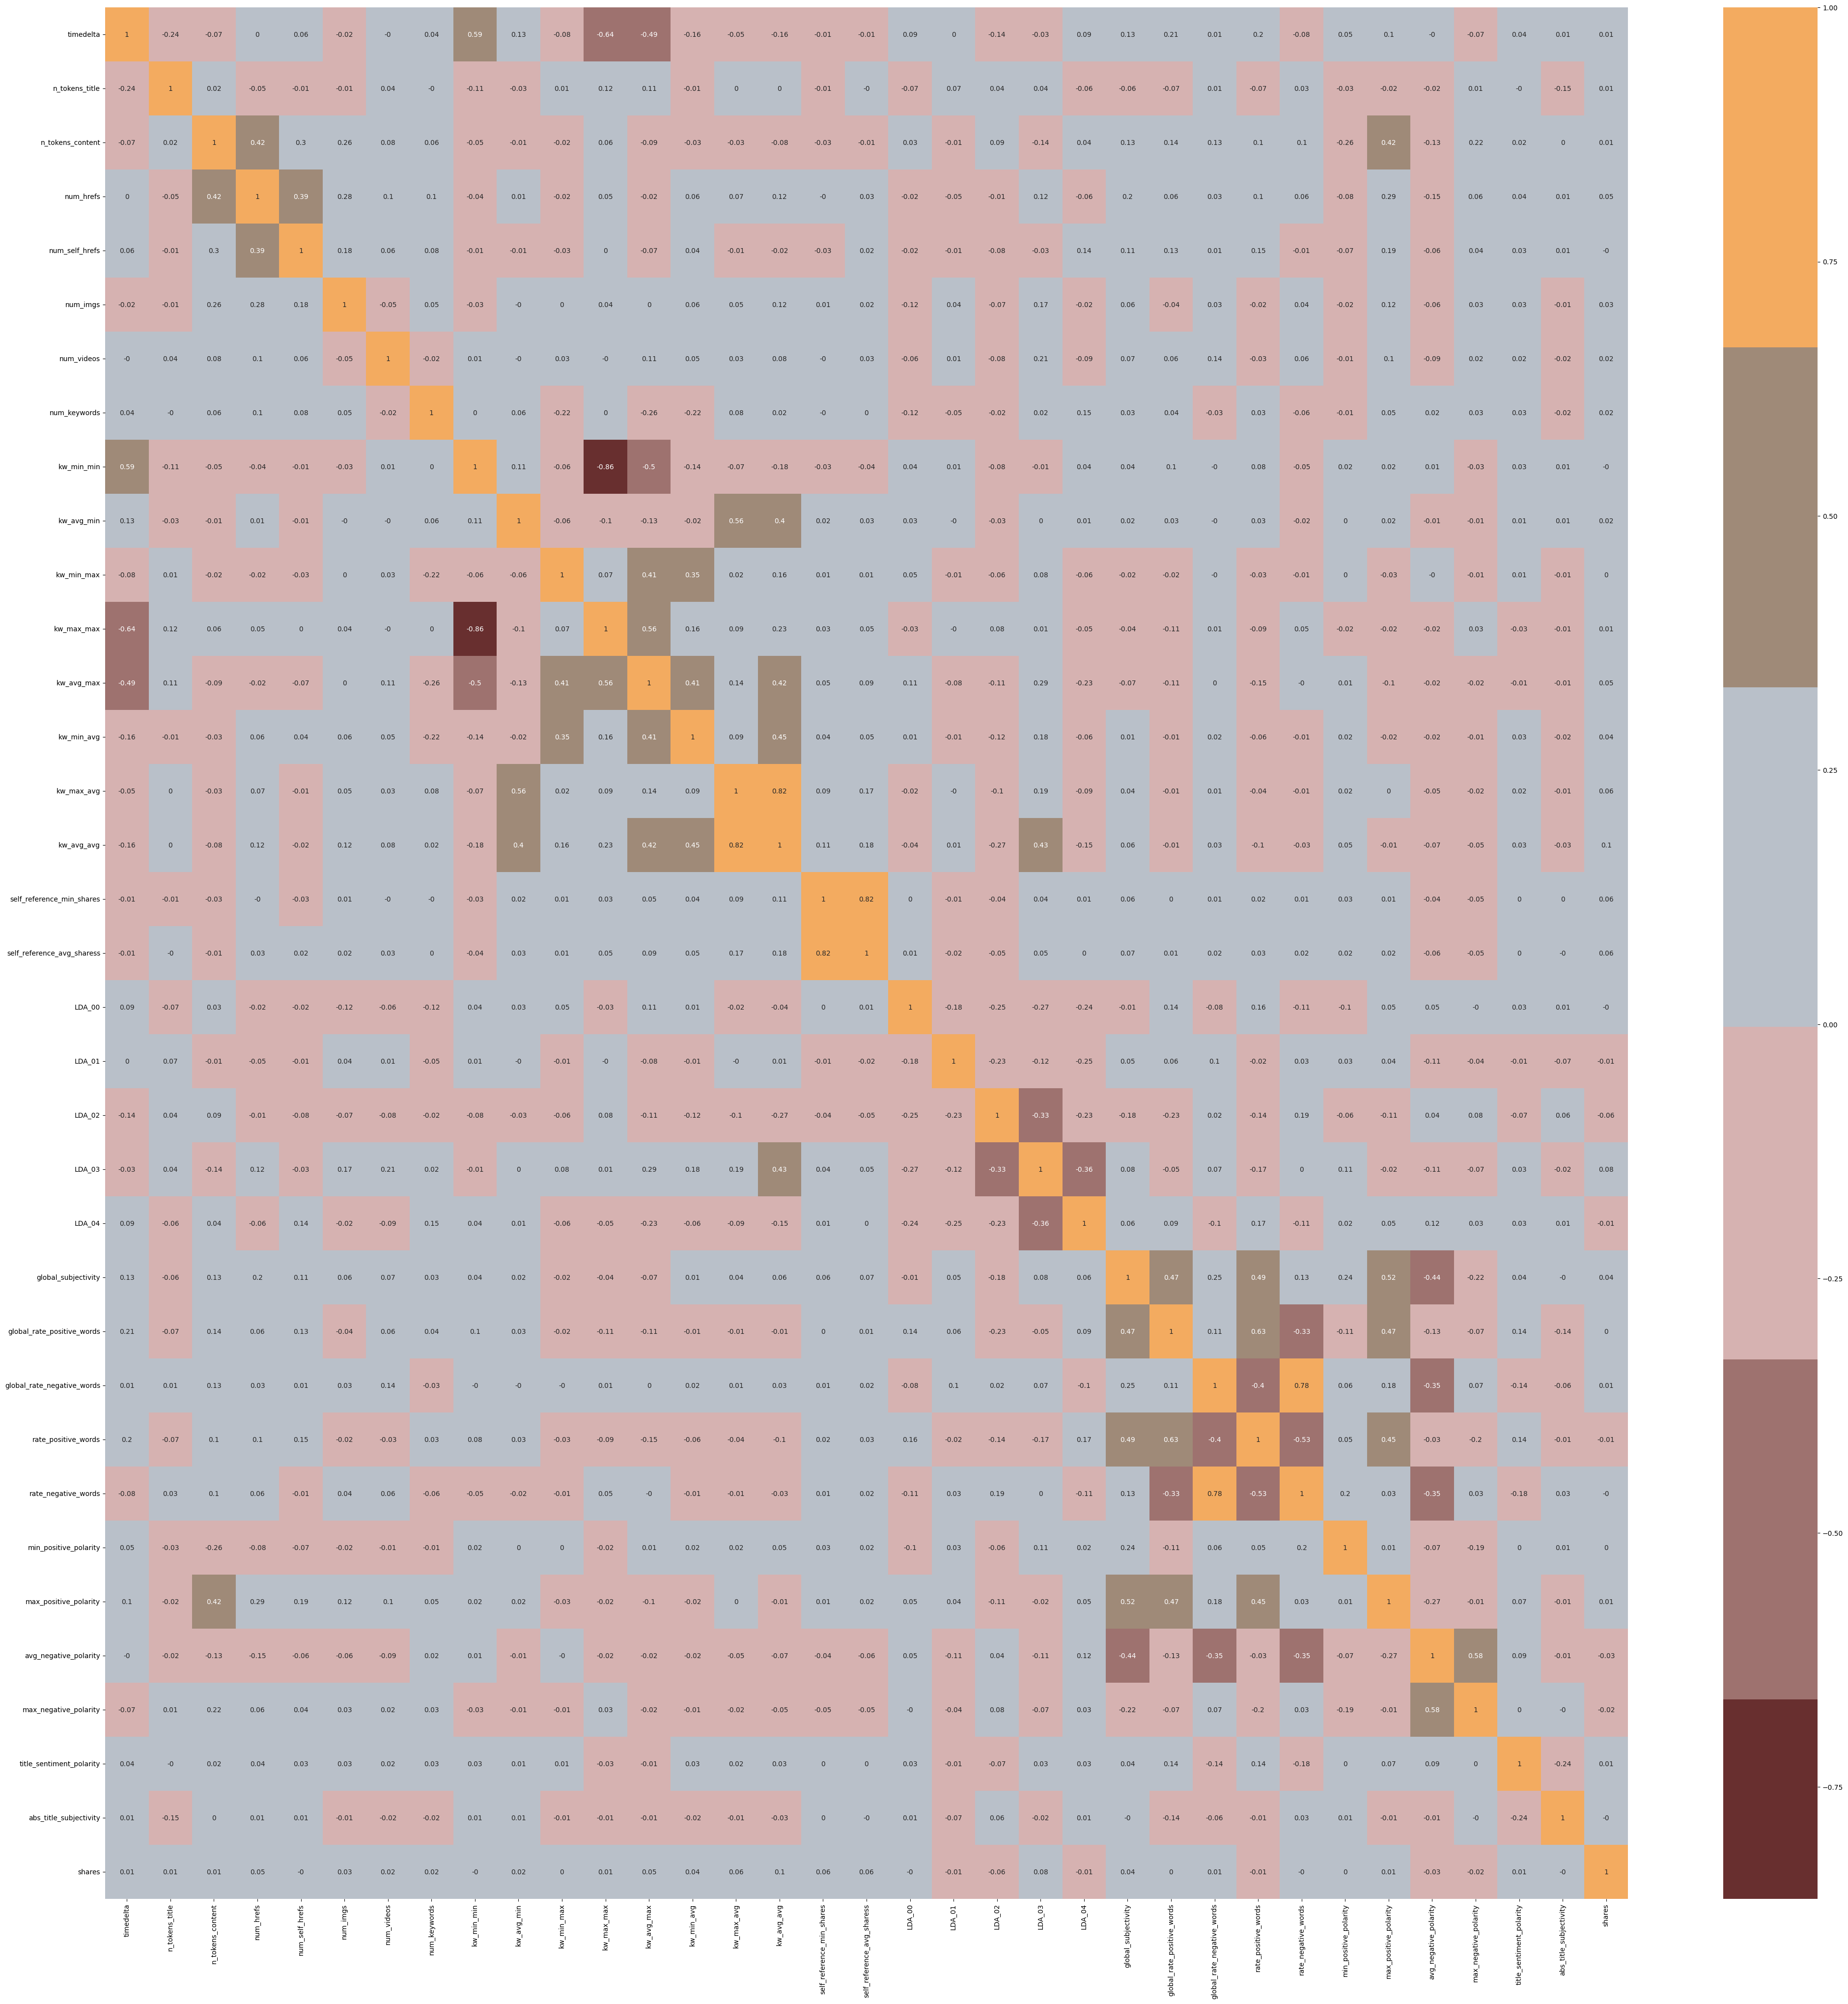

In [ ]:
#correlation matrix

# "EXCLUDING THE CATEGORICAL FEATURES"

from matplotlib import colors
corrmat= dev.corr().round(2) #get 2 decimal points
plt.figure(figsize=(50,50))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.savefig('corrMatrix.png')

In [ ]:
corrmat.shape

(35, 35)

<ipython-input-25-720ae79a0a45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dev.corr(method ='pearson')


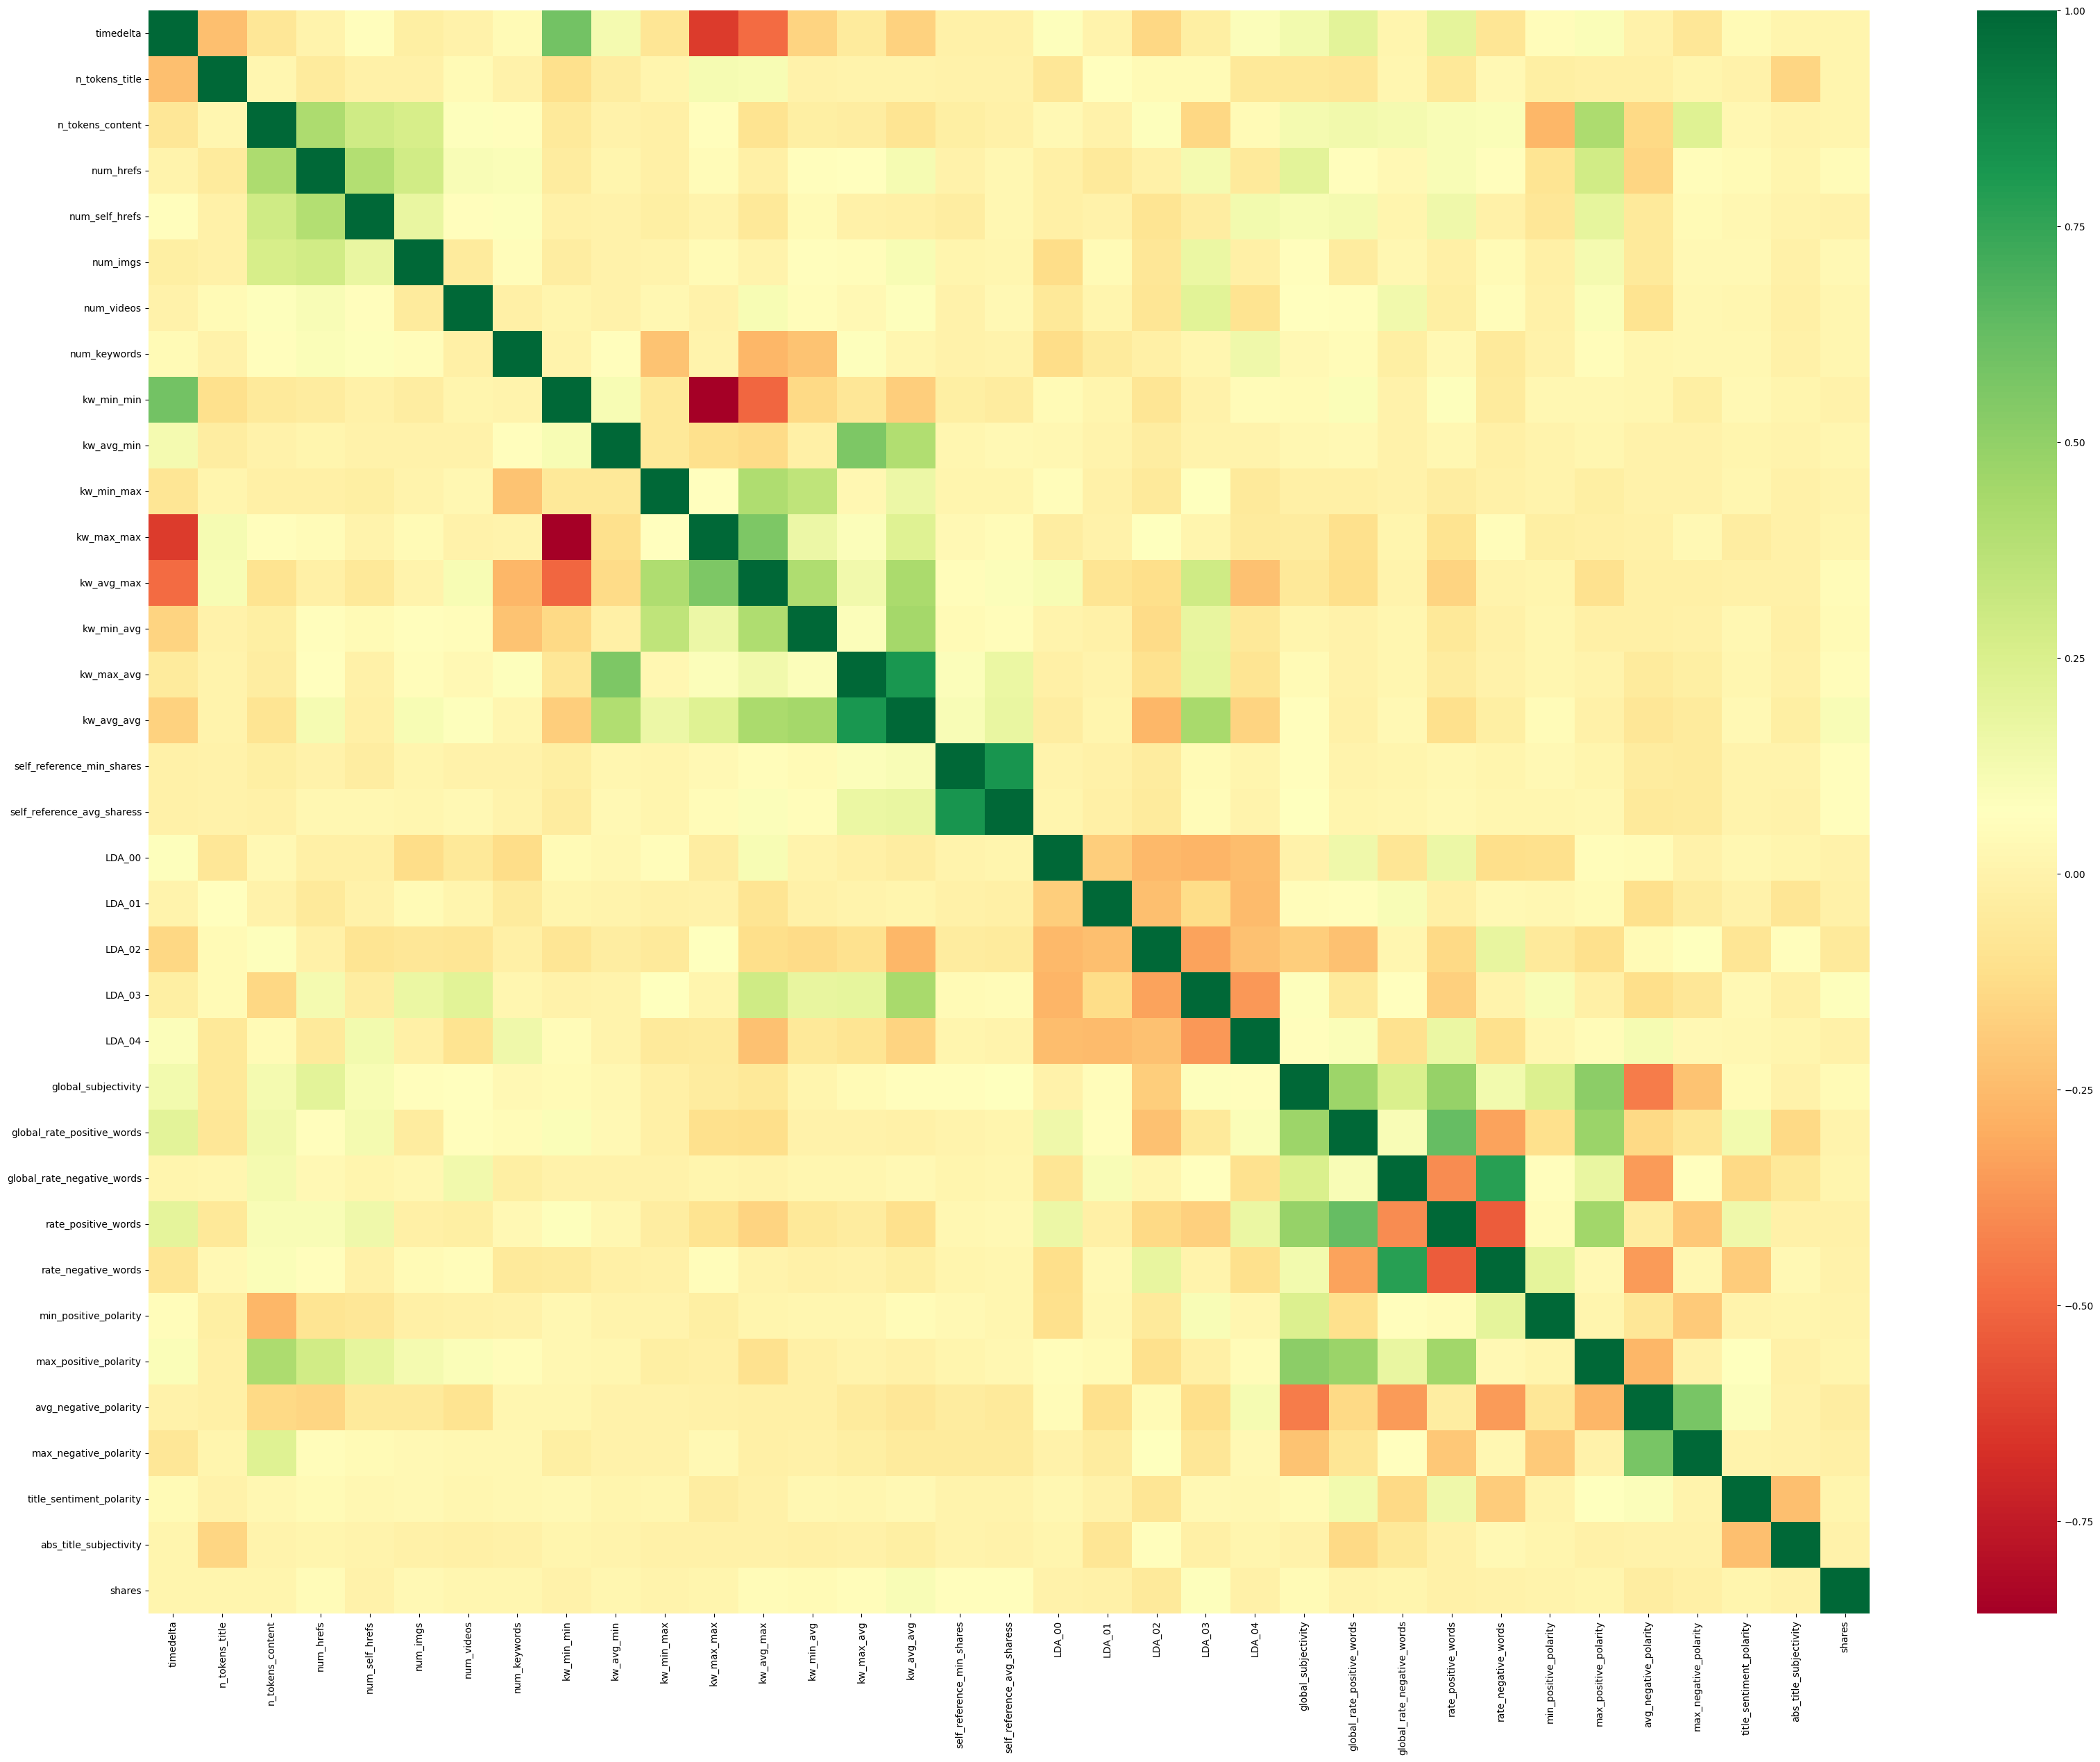

In [ ]:
plt.figure(figsize=(40,30))
cor = dev.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.savefig('pearsonCorrMatrix.png')
plt.show()

In [ ]:
cor.shape

(35, 35)

#Label Encoding

In [ ]:
# *****LABEL ENCODER*****

#Converting categorical features into numberical features
# using label encoding with scikit-learn's LabelEncoder

from sklearn.preprocessing import LabelEncoder

categorical_features = ['data_channel','weekday']
label_encoder = LabelEncoder()

# Perform label encoding on the categorical features

for feature in categorical_features:
    dev[feature] = label_encoder.fit_transform(dev[feature])

# Display the transformed DataFrame
dev.head(10)

In [ ]:
dev.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,shares,data_channel,weekday
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,10.865143,3.274381,4.559672,1.272079,7.219234,26.094624,310.665636,...,0.288134,0.095466,0.756271,-0.259198,-0.107397,0.069909,0.341805,3407.068863,2.571496,3.279489
std,214.314223,2.115643,467.730448,11.295386,3.822364,8.376480,4.212123,1.904915,69.607933,621.518386,...,0.156324,0.071362,0.247798,0.127508,0.094932,0.265514,0.188980,11899.460219,1.787036,2.137443
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,4.000000,0.000000,0.000000
25%,163.000000,9.000000,246.000000,4.000000,1.000000,1.000000,0.000000,6.000000,-1.000000,141.732143,...,0.185185,0.050000,0.600000,-0.328333,-0.125000,0.000000,0.166667,946.000000,1.000000,1.000000
50%,338.000000,10.000000,409.000000,7.000000,3.000000,1.000000,0.000000,7.000000,-1.000000,235.857143,...,0.280000,0.100000,0.800000,-0.252976,-0.100000,0.000000,0.500000,1400.000000,2.000000,4.000000
75%,542.000000,12.000000,713.000000,14.000000,4.000000,4.000000,1.000000,9.000000,4.000000,357.112500,...,0.384615,0.100000,1.000000,-0.186111,-0.050000,0.141667,0.500000,2800.000000,4.000000,5.000000
max,731.000000,23.000000,8474.000000,304.000000,116.000000,128.000000,91.000000,10.000000,294.000000,42827.857143,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,843300.000000,5.000000,6.000000


In [ ]:
dev_df = dev.copy()
dev_df.head(5)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,shares,data_channel,weekday
0,121.0,12.0,1015.0,10.0,6.0,33.0,1.0,4.0,-1.0,110.500000,...,0.176471,0.100000,0.8,-0.160714,-0.071429,0.00,0.5,2900,0,5
1,532.0,9.0,503.0,9.0,0.0,33.0,1.0,10.0,4.0,524.750000,...,0.370370,0.136364,1.0,-0.157500,-0.100000,0.00,0.5,1300,4,4
2,435.0,9.0,232.0,12.0,3.0,4.0,1.0,6.0,4.0,198.666667,...,0.714286,0.375000,0.5,-0.427500,-0.187500,0.00,0.5,17700,2,6
3,134.0,12.0,171.0,9.0,5.0,0.0,1.0,6.0,-1.0,444.166667,...,0.714286,0.500000,0.5,-0.216667,-0.166667,-0.25,0.1,1500,0,6
4,728.0,11.0,286.0,5.0,2.0,0.0,0.0,6.0,217.0,356.200000,...,0.411765,0.100000,0.6,-0.251786,-0.100000,-0.10,0.3,1400,4,4


#FEATURE SELECTION STEP - FEATURE ENGINEERING

In [ ]:
### ***** ALL THE FEATURES *****

word_features = ['n_tokens_title',
                 'n_tokens_content',
                 'n_unique_tokens',
                 'n_non_stop_words',
                 'n_non_stop_unique_tokens',
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday']

channel_features = ['data_channel']

timedelta = ['timedelta']

ids = ['id']

others = ['url']

target = ['shares']


keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max',
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']



subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

print(len(word_features)+len(media_features)+len(temporal_features)
+len(channel_features)+len(keyword_features)
+len(reference_features)+len(topic_features)
+len(subjectivity_features)+len(sentiment_features)+len(timedelta))

47


In [ ]:
# ***** KEPT FEATURES AFTER ANALYZING THE CORRELATION MATRIX
# ***** AND FEATURE IMPORTANCE ANALYSIS

selected_features = ['timedelta','LDA_04','LDA_00','n_non_stop_unique_tokens',
 'avg_negative_polarity','title_subjectivity','num_hrefs',
                     'kw_avg_min','kw_max_avg','kw_avg_avg',
                     'self_reference_min_shares','self_reference_avg_sharess',
                     'self_reference_max_shares','average_token_length','shares']



print(len(selected_features))




15


In [ ]:
# Create a list of preferred columns

# Select the preferred columns from the DataFrame
dev_df = dev[selected_features]

# Print the selected DataFrame
dev_df.head(10)

In [ ]:
dev_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,kw_min_min,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,0.672973,10.865143,3.274381,4.559672,1.272079,4.547096,26.094624,...,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863,2.571496,3.279489
std,214.314223,2.115643,467.730448,0.154128,11.295386,3.822364,8.376480,4.212123,0.845050,69.607933,...,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219,1.787036,2.137443
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,163.000000,9.000000,246.000000,0.626028,4.000000,1.000000,1.000000,0.000000,4.477934,-1.000000,...,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,1.000000,1.000000
50%,338.000000,10.000000,409.000000,0.690909,7.000000,3.000000,1.000000,0.000000,4.664251,-1.000000,...,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,2.000000,4.000000
75%,542.000000,12.000000,713.000000,0.754644,14.000000,4.000000,4.000000,1.000000,4.853503,4.000000,...,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000,4.000000,5.000000
max,731.000000,23.000000,8474.000000,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,294.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,5.000000,6.000000


In [ ]:
# *****STANDARD SCALING***** ONLY NORMALIZING SELECTED COLUMNS

# Data normalization techniques are used to scale and transform
# the features of a dataset to a standard range or distribution.
# Select the features to be scaled

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Normalize using Standard scaling
# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize all features in the DataFrame
# df_normalized = pd.DataFrame(scaler.fit_transform(dev), columns=dev.columns)


# selected_features = ['timedelta','LDA_04','LDA_00','n_non_stop_unique_tokens',
#  'avg_negative_polarity','title_subjectivity','num_hrefs',
#                      'kw_avg_min','kw_max_avg','kw_avg_avg',
#                      'self_reference_min_shares','self_reference_avg_sharess',
#                      'self_reference_max_shares','average_token_length','shares']

selected_columns=['num_hrefs',
                     'kw_avg_min','kw_max_avg','kw_avg_avg',
                     'self_reference_min_shares','self_reference_avg_sharess',
                     'self_reference_max_shares']


# Columns to apply Standard scaling
# selected_columns = ['n_tokens_content','kw_max_min','kw_avg_min','kw_min_max',
#                     'kw_max_max','kw_avg_max','kw_avg_min','kw_max_avg','kw_avg_avg',
#                     'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']



# Apply Standard scaling to selected columns
dev_df[selected_columns] = scaler.fit_transform(dev_df[selected_columns])


# Display the normalized DataFrame
dev_df.head(5)

In [ ]:
dev_df.describe()

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_max_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,10.865143,3.274381,4.559672,1.272079,7.219234,26.094624,1146.761240,...,0.353661,0.095466,0.756271,0.281647,0.069909,0.341805,0.155974,3407.068863,2.571496,3.279489
std,214.314223,2.115643,467.730448,11.295386,3.822364,8.376480,4.212123,1.904915,69.607933,3949.597979,...,0.104526,0.071362,0.247798,0.323834,0.265514,0.188980,0.225957,11899.460219,1.787036,2.137443
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,163.000000,9.000000,246.000000,4.000000,1.000000,1.000000,0.000000,6.000000,-1.000000,445.000000,...,0.306108,0.050000,0.600000,0.000000,0.000000,0.166667,0.000000,946.000000,1.000000,1.000000
50%,338.000000,10.000000,409.000000,7.000000,3.000000,1.000000,0.000000,7.000000,-1.000000,659.000000,...,0.358929,0.100000,0.800000,0.144444,0.000000,0.500000,0.000000,1400.000000,2.000000,4.000000
75%,542.000000,12.000000,713.000000,14.000000,4.000000,4.000000,1.000000,9.000000,4.000000,1000.000000,...,0.411685,0.100000,1.000000,0.500000,0.141667,0.500000,0.250000,2800.000000,4.000000,5.000000
max,731.000000,23.000000,8474.000000,304.000000,116.000000,128.000000,91.000000,10.000000,294.000000,298400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,5.000000,6.000000


#Spliting the dataset


In [ ]:
y=dev_df['shares']
X=dev_df.drop('shares',axis=1)
X.head(10)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,data_channel,weekday
0,121.0,12.0,1015.0,10.0,6.0,33.0,1.0,4.0,-1.0,110.500000,...,0.823529,0.176471,0.100000,0.8,-0.160714,-0.071429,0.00,0.50,0,5
1,532.0,9.0,503.0,9.0,0.0,33.0,1.0,10.0,4.0,524.750000,...,0.629630,0.370370,0.136364,1.0,-0.157500,-0.100000,0.00,0.50,4,4
2,435.0,9.0,232.0,12.0,3.0,4.0,1.0,6.0,4.0,198.666667,...,0.285714,0.714286,0.375000,0.5,-0.427500,-0.187500,0.00,0.50,2,6
3,134.0,12.0,171.0,9.0,5.0,0.0,1.0,6.0,-1.0,444.166667,...,0.285714,0.714286,0.500000,0.5,-0.216667,-0.166667,-0.25,0.10,0,6
4,728.0,11.0,286.0,5.0,2.0,0.0,0.0,6.0,217.0,356.200000,...,0.588235,0.411765,0.100000,0.6,-0.251786,-0.100000,-0.10,0.30,4,4
5,38.0,14.0,322.0,4.0,4.0,2.0,1.0,6.0,-1.0,554.333333,...,0.666667,0.333333,0.100000,1.0,-0.200000,-0.100000,0.00,0.50,1,1
6,721.0,11.0,250.0,2.0,1.0,1.0,0.0,5.0,217.0,894.250000,...,0.769231,0.230769,0.100000,0.6,-0.226852,-0.125000,0.50,0.00,4,4
7,294.0,11.0,550.0,16.0,6.0,1.0,1.0,8.0,-1.0,141.375000,...,0.454545,0.545455,0.100000,0.8,-0.309568,-0.050000,0.25,0.25,4,4
8,163.0,7.0,525.0,13.0,1.0,1.0,0.0,5.0,-1.0,31.000000,...,0.500000,0.500000,0.050000,0.5,-0.235069,-0.050000,0.00,0.50,0,5
9,113.0,11.0,1450.0,8.0,7.0,5.0,0.0,6.0,-1.0,133.166667,...,0.592593,0.407407,0.050000,0.7,-0.232967,-0.100000,0.00,0.50,1,6


In [ ]:
y.head(10)

0     2900
1     1300
2    17700
3     1500
4     1400
5     2900
6      801
7     3000
8     1000
9      367
Name: shares, dtype: int64

In [ ]:
# Calculate the correlation between features and target variable
correlations = X.corrwith(y)

# Print the correlation values
print(correlations)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_split=10000)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10000)

In [ ]:

predicted_test = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 3104.0731979430125
Mean Squared Error: 141514189.22602886
Root Mean Squared Error: 11895.973656074935


In [ ]:
y=dev_df['shares']
X=dev_df.drop('shares',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestRegressor(min_samples_split=5)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5)

In [ ]:
predicted_test = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 3443.054374074542
Mean Squared Error: 150342748.34888548
Root Mean Squared Error: 12261.43337252564


In [ ]:
rf = RandomForestRegressor(min_samples_split=12)
rf.fit(X_train, y_train)


RandomForestRegressor(min_samples_split=12)

In [ ]:
predicted_test = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 3371.9616596299884
Mean Squared Error: 146875027.55897847
Root Mean Squared Error: 12119.200780537405


#FEATURE IMPORTANCE CALCULATION

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(rf, X_train);

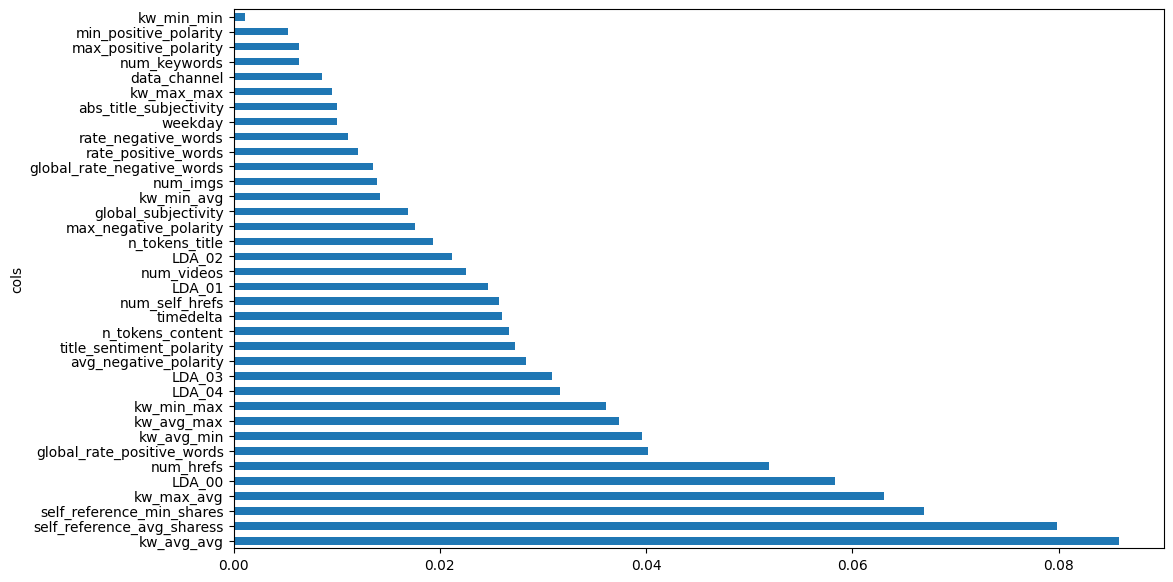

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:50]);
plt.savefig('feature importance.png')

In [ ]:
dev.head(10)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,shares,data_channel,weekday
0,121.0,12.0,1015.0,10.0,6.0,33.0,1.0,4.0,-1.0,110.500000,...,0.176471,0.100000,0.8,-0.160714,-0.071429,0.00,0.50,2900,0,5
1,532.0,9.0,503.0,9.0,0.0,33.0,1.0,10.0,4.0,524.750000,...,0.370370,0.136364,1.0,-0.157500,-0.100000,0.00,0.50,1300,4,4
2,435.0,9.0,232.0,12.0,3.0,4.0,1.0,6.0,4.0,198.666667,...,0.714286,0.375000,0.5,-0.427500,-0.187500,0.00,0.50,17700,2,6
3,134.0,12.0,171.0,9.0,5.0,0.0,1.0,6.0,-1.0,444.166667,...,0.714286,0.500000,0.5,-0.216667,-0.166667,-0.25,0.10,1500,0,6
4,728.0,11.0,286.0,5.0,2.0,0.0,0.0,6.0,217.0,356.200000,...,0.411765,0.100000,0.6,-0.251786,-0.100000,-0.10,0.30,1400,4,4
5,38.0,14.0,322.0,4.0,4.0,2.0,1.0,6.0,-1.0,554.333333,...,0.333333,0.100000,1.0,-0.200000,-0.100000,0.00,0.50,2900,1,1
6,721.0,11.0,250.0,2.0,1.0,1.0,0.0,5.0,217.0,894.250000,...,0.230769,0.100000,0.6,-0.226852,-0.125000,0.50,0.00,801,4,4
7,294.0,11.0,550.0,16.0,6.0,1.0,1.0,8.0,-1.0,141.375000,...,0.545455,0.100000,0.8,-0.309568,-0.050000,0.25,0.25,3000,4,4
8,163.0,7.0,525.0,13.0,1.0,1.0,0.0,5.0,-1.0,31.000000,...,0.500000,0.050000,0.5,-0.235069,-0.050000,0.00,0.50,1000,0,5
9,113.0,11.0,1450.0,8.0,7.0,5.0,0.0,6.0,-1.0,133.166667,...,0.407407,0.050000,0.7,-0.232967,-0.100000,0.00,0.50,367,1,6


In [ ]:
# Training and Hyper Tuning of Parameters

ac=[]
for x in range(2,15):
    rf = RandomForestRegressor(min_samples_split=x)
    rf.fit(X_train, y_train)
    predicted_test1 = rf.predict(X_test)
    ac.append(np.sqrt(metrics.mean_squared_error(y_test, predicted_test1)))

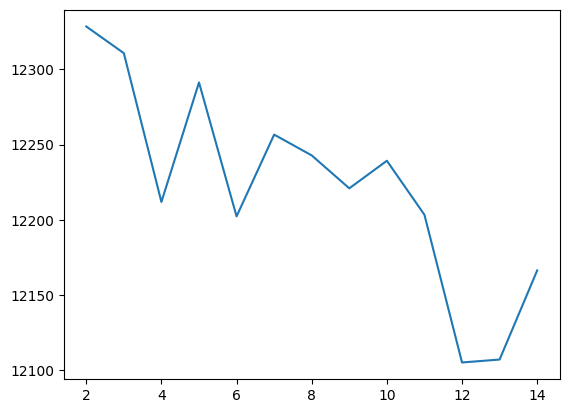

In [ ]:
b=[2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(b,ac)
plt.savefig('min_num_split tuning.png')

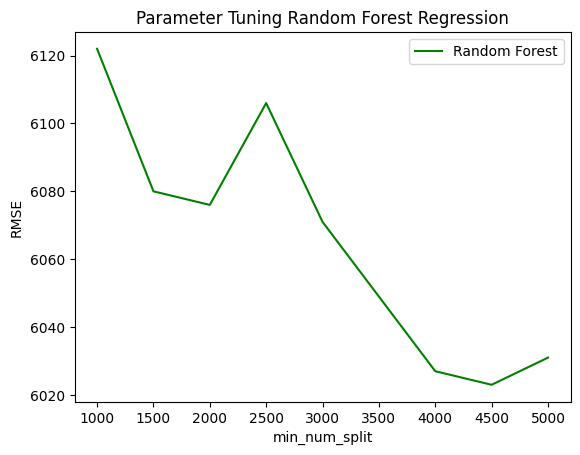

In [ ]:

min_nums_split=[1000,1500,2000,2500,3000,3500,4000,4500,5000]
rmse=[6122,6080,6076,6106,6071,6049,6027,6023,6031]

plt.plot(min_nums_split,rmse,label='Random Forest',color='green')

# Set plot labels and title
plt.xlabel('min_num_split')
plt.ylabel('RMSE')
plt.title('Parameter Tuning Random Forest Regression')

# Show a legend
plt.legend()

# Display the plot
# plt.show()
plt.savefig('random_tuning.png')
plt.show()

#Ridge


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Ridge regression model
ridge = Ridge(alpha=0.5)  # You can adjust the alpha hyperparameter to control regularization

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Predict on the testing data
y_pred = ridge.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 141368887.84910446
Root Mean Squared Error: 11889.864921398581


#Lasso


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
pipeline = Pipeline([
    ('lasso', Lasso())  # Lasso regression model
])


In [ ]:
param_grid = {
    'lasso__alpha': [100.0]  # Example alpha values to be tuned
}


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('lasso', Lasso())]),
             param_grid={'lasso__alpha': [100.0]})

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 141621181.38750917
Root Mean Squared Error: 11900.46979692437


#Result


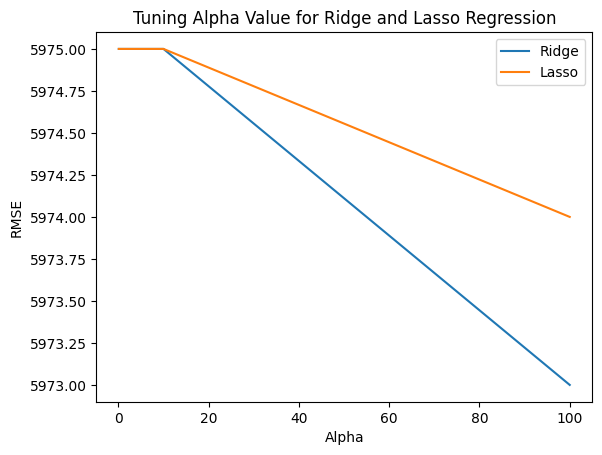

In [ ]:
import matplotlib.pyplot as plt
alphas=[0.1,0.5,1.0,10.0,100.0]
rmse_values_ridge=[5975, 5975,5975,5975,5973]
rmse_values_lasso=[5975, 5975,5975,5975,5974]
plt.plot(alphas,rmse_values_ridge,label='Ridge')
plt.plot(alphas,rmse_values_lasso,label='Lasso')

# Set plot labels and title
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Tuning Alpha Value for Ridge and Lasso Regression')

# Show a legend
plt.legend()

# Display the plot
# plt.show()
plt.savefig('comparing.png',dpi=300)
plt.show()

#LOADING EVALUATION DATASET

In [ ]:
#Loading the dataset -EVALUATION DATASET
eval_path = "/content/drive/MyDrive/DSLSummer2023/evaluation.csv"
eval = pd.read_csv(eval_path)
print("Number of records:", len(eval))
eval.head()

In [ ]:
#Information on features - EVALUATION DATASET
eval.info()

In [ ]:
# Dataset without shares (label) column - EVALUATION DATASET'S SHAPE
eval.shape


(7917, 49)

In [ ]:
#There is NAN values in some features
eval.isnull().values.any()

True

In [ ]:
## *** LEFT DATAFRAME AFTER DROPPING SOME FEATURES
# Create a list of columns to drop


# THIS IS WORLED REALLY WELL WITH THE RESULT OF RMSE: 5975.233
# columns_to_drop = ['url','n_unique_tokens', 'n_non_stop_unique_tokens',
#                     'n_non_stop_words', 'average_token_length','kw_max_min',
#                    'self_reference_max_shares','global_sentiment_polarity',
#                    'avg_positive_polarity','min_negative_polarity',
#                    'title_subjectivity','abs_title_sentiment_polarity']


# columns_to_drop = ['url','timedelta','n_tokens_title',
#                  'n_tokens_content','n_unique_tokens','n_non_stop_words',
#                  'n_non_stop_unique_tokens',  'average_token_length','num_self_hrefs',
#                    'kw_min_min','kw_min_max','kw_max_max',
#                    'LDA_00', 'LDA_01', 'LDA_02','LDA_04',
#                    'global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words',
#                    'rate_positive_words','rate_negative_words','min_positive_polarity', 'max_positive_polarity',
#                    'avg_negative_polarity', 'min_negative_polarity','max_negative_polarity',
#                    'title_sentiment_polarity','abs_title_sentiment_polarity']

# columns_to_drop = ['id','url','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
#                    'average_token_length',
#                    'LDA_01', 'LDA_02','LDA_04',
#                    'rate_positive_words','avg_negative_polarity', 'min_negative_polarity','max_negative_polarity']

# columns_to_drop = ['url','n_unique_tokens','kw_min_min','title_subjectivity',
#                      'global_sentiment_polarity']

# columns_to_drop = ['url','average_token_length','kw_max_min','kw_avg_min','n_non_stop_unique_tokens',
#                    'avg_positive_polarity','min_negative_polarity','avg_negative_polarity']

columns_to_drop = ['url','n_unique_tokens', 'n_non_stop_unique_tokens',
                    'n_non_stop_words', 'average_token_length','kw_max_min',
                   'self_reference_max_shares','global_sentiment_polarity',
                   'avg_positive_polarity','min_negative_polarity',
                   'title_subjectivity','abs_title_sentiment_polarity']


# Drop the columns from the DataFrame inplace
eval.drop(columns_to_drop, axis=1, inplace=True)

# eval.drop(labels=['url'], axis = 1,inplace=True)

eval.head(5)


In [ ]:
eval.isnull().sum()

In [ ]:
eval = eval.ffill()

In [ ]:
# Forward fill missing values (fill with the previous non-missing value)
eval.isna().sum()
eval.head(5)

# Fill missing values with the mean of each column
# df_filled = df.fillna(df.mean())

In [ ]:
#After handling with missing values ()
eval.isnull().sum()

id                            0
timedelta                     0
n_tokens_title                0
n_tokens_content              0
num_hrefs                     0
num_self_hrefs                0
num_imgs                      0
num_videos                    0
num_keywords                  0
kw_min_min                    0
kw_avg_min                    0
kw_min_max                    0
kw_max_max                    0
kw_avg_max                    0
kw_min_avg                    0
kw_max_avg                    0
kw_avg_avg                    0
self_reference_min_shares     0
self_reference_avg_sharess    0
LDA_00                        0
LDA_01                        0
LDA_02                        0
LDA_03                        0
LDA_04                        0
global_subjectivity           0
global_rate_positive_words    0
global_rate_negative_words    0
rate_positive_words           0
rate_negative_words           0
min_positive_polarity         0
max_positive_polarity         0
avg_nega

In [ ]:
# Dataset without shares (label) column - EVALUATION DATASET'S SHAPE
eval.shape


(7917, 37)

In [ ]:
eval.describe()

,id,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity
count,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,...,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000
mean,35679.634584,356.530125,10.429456,556.792598,10.951244,3.371605,4.754579,1.280283,7.236706,26.167867,...,0.039760,0.016560,0.683394,0.287302,0.095399,0.758738,-0.260873,-0.107924,0.077395,0.341840
std,2289.051312,213.566513,2.107635,484.441502,11.465886,3.984412,8.418291,4.107897,1.894529,69.751589,...,0.017415,0.010564,0.189135,0.155447,0.071130,0.247421,0.128488,0.097145,0.265001,0.188078
min,31715.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,33699.000000,171.000000,9.000000,246.000000,4.000000,1.000000,1.000000,0.000000,6.000000,-1.000000,...,0.028409,0.009662,0.600000,0.185185,0.050000,0.600000,-0.328571,-0.125000,0.000000,0.166667
50%,35680.000000,340.000000,10.000000,413.000000,8.000000,3.000000,1.000000,0.000000,7.000000,-1.000000,...,0.039231,0.015365,0.711111,0.280000,0.100000,0.800000,-0.255556,-0.100000,0.000000,0.500000
75%,37661.000000,543.000000,12.000000,726.000000,13.000000,4.000000,5.000000,1.000000,9.000000,4.000000,...,0.050473,0.021816,0.800000,0.380952,0.100000,1.000000,-0.187500,-0.050000,0.160000,0.500000
max,39643.000000,731.000000,19.000000,6159.000000,187.000000,65.000000,99.000000,73.000000,10.000000,377.000000,...,0.152174,0.094118,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000


In [ ]:
# Perform label encoding on the categorical features

for feature in categorical_features:
    eval[feature] = label_encoder.fit_transform(eval[feature])

# Display the transformed DataFrame
eval.head(10)

,id,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,data_channel,weekday
0,31715,122.0,12.0,606.0,12.0,9.0,3.0,0.0,10.0,-1.0,...,0.675676,0.324324,0.033333,0.600000,-0.334722,-0.100000,-0.4,0.1,4,1
1,31716,466.0,13.0,169.0,6.0,2.0,0.0,0.0,10.0,4.0,...,0.857143,0.142857,0.100000,0.500000,-0.500000,-0.500000,0.1,0.4,4,3
2,31717,245.0,8.0,347.0,11.0,3.0,0.0,0.0,10.0,-1.0,...,0.666667,0.333333,0.250000,0.600000,-0.533333,-0.400000,0.6,0.5,1,4
3,31718,458.0,12.0,299.0,6.0,5.0,1.0,0.0,10.0,4.0,...,0.705882,0.294118,0.062500,1.000000,-0.220000,-0.050000,0.0,0.5,0,1
4,31719,680.0,9.0,550.0,6.0,3.0,1.0,0.0,6.0,217.0,...,0.692308,0.307692,0.033333,1.000000,-0.144610,-0.071429,-0.1,0.4,4,6
5,31720,250.0,13.0,477.0,5.0,1.0,1.0,0.0,9.0,-1.0,...,0.774194,0.225806,0.100000,1.000000,-0.236508,-0.155556,0.0,0.5,5,2
6,31721,503.0,12.0,144.0,3.0,2.0,0.0,1.0,6.0,4.0,...,0.750000,0.250000,0.200000,0.433333,-0.100000,-0.100000,0.0,0.5,4,0
7,31722,507.0,9.0,407.0,5.0,2.0,1.0,0.0,8.0,4.0,...,0.700000,0.300000,0.100000,1.000000,-0.280159,-0.100000,0.0,0.5,4,1
8,31723,340.0,11.0,1951.0,3.0,1.0,1.0,0.0,8.0,-1.0,...,0.736527,0.263473,0.033333,1.000000,-0.287734,-0.050000,0.1,0.3,3,3
9,31724,633.0,14.0,334.0,14.0,1.0,1.0,0.0,8.0,4.0,...,0.545455,0.454545,0.050000,1.000000,-0.433333,-0.100000,0.0,0.5,2,1


In [ ]:
eval_df = eval.copy()
eval_df

,id,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,data_channel,weekday
0,31715,122.0,12.0,606.0,12.0,9.0,3.0,0.0,10.0,-1.0,...,0.675676,0.324324,0.033333,0.6,-0.334722,-0.100000,-0.400,0.100000,4,1
1,31716,466.0,13.0,169.0,6.0,2.0,0.0,0.0,10.0,4.0,...,0.857143,0.142857,0.100000,0.5,-0.500000,-0.500000,0.100,0.400000,4,3
2,31717,245.0,8.0,347.0,11.0,3.0,0.0,0.0,10.0,-1.0,...,0.666667,0.333333,0.250000,0.6,-0.533333,-0.400000,0.600,0.500000,1,4
3,31718,458.0,12.0,299.0,6.0,5.0,1.0,0.0,10.0,4.0,...,0.705882,0.294118,0.062500,1.0,-0.220000,-0.050000,0.000,0.500000,0,1
4,31719,680.0,9.0,550.0,6.0,3.0,1.0,0.0,6.0,217.0,...,0.692308,0.307692,0.033333,1.0,-0.144610,-0.071429,-0.100,0.400000,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,39639,616.0,8.0,123.0,3.0,0.0,0.0,1.0,6.0,4.0,...,1.000000,0.000000,0.166667,0.6,0.000000,0.000000,0.000,0.500000,2,4
7913,39640,516.0,11.0,218.0,14.0,2.0,10.0,0.0,7.0,4.0,...,0.733333,0.266667,0.250000,1.0,-0.147917,-0.050000,0.375,0.194444,2,2
7914,39641,35.0,11.0,172.0,5.0,3.0,2.0,0.0,8.0,-1.0,...,0.181818,0.818182,0.214286,0.5,-0.104233,-0.050000,-0.050,0.350000,1,4
7915,39642,716.0,7.0,90.0,4.0,3.0,0.0,0.0,8.0,217.0,...,0.833333,0.166667,0.100000,0.5,-0.200000,-0.200000,0.250,0.000000,2,5


In [ ]:
# Create a list of preferred columns


selected_features_eval = ['id','timedelta','LDA_04','LDA_00','n_non_stop_unique_tokens',
 'avg_negative_polarity','title_subjectivity','num_hrefs',
                     'kw_avg_min','kw_max_avg','kw_avg_avg',
                     'self_reference_min_shares','self_reference_avg_sharess',
                     'self_reference_max_shares','average_token_length']

# Select the preferred columns from the DataFrame
eval_df = eval[selected_features_eval]

# Print the selected DataFrame
eval_df.head(10)

,id,timedelta,LDA_04,LDA_00,n_non_stop_unique_tokens,avg_negative_polarity,title_subjectivity,num_hrefs,kw_avg_min,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,self_reference_max_shares,average_token_length
0,31715,122.0,0.494747,0.445070,0.645161,-0.334722,0.6,12.0,73.800000,4504.425620,3111.263580,968.0,2147.2,3600.0,4.813531
1,31716,466.0,0.383842,0.020004,0.814815,-0.500000,0.1,6.0,412.125000,4101.929204,2510.996878,1000.0,1000.0,1000.0,4.810651
2,31717,245.0,0.050000,0.050000,0.669421,-0.533333,1.0,11.0,24.000000,3587.938774,3147.473268,1200.0,1750.0,2300.0,5.063401
3,31718,458.0,0.489314,0.360407,0.759358,-0.220000,1.0,6.0,154.250000,3259.745585,2226.234882,609.0,2458.0,6100.0,5.063545
4,31719,680.0,0.866573,0.033419,0.670769,-0.144610,0.1,6.0,307.000000,2945.312989,2196.830479,1300.0,1450.0,1600.0,4.530909
5,31720,250.0,0.338512,0.022227,0.675373,-0.236508,0.0,5.0,82.285714,7712.934783,2571.117534,3900.0,3900.0,3900.0,4.457023
6,31721,503.0,0.866646,0.033339,0.769231,-0.100000,0.0,3.0,965.800000,4400.000000,2629.310072,548.0,2474.0,4400.0,4.819444
7,31722,507.0,0.627347,0.025011,0.643478,-0.280159,0.0,5.0,136.857143,3255.089319,2486.362885,12400.0,12400.0,12400.0,5.000000
8,31723,340.0,0.337394,0.562000,0.610732,-0.287734,0.2,3.0,114.833333,4276.438410,3860.292868,0.0,0.0,0.0,4.456176
9,31724,633.0,0.025000,0.025001,0.645455,-0.433333,0.0,14.0,690.625000,8057.131579,4447.096603,14700.0,14700.0,14700.0,4.520958


In [ ]:
eval_df.describe()

,id,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_max_min,...,rate_positive_words,avg_positive_polarity,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday
count,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,...,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000,7917.000000
mean,35679.634584,10.429456,556.792598,10.951244,3.371605,4.754579,1.280283,4.554234,7.236706,1166.900688,...,0.683394,0.354608,0.095399,-0.260873,-0.107924,0.077395,0.341840,0.156385,2.581028,3.329418
std,2289.051312,2.107635,484.441502,11.465886,3.984412,8.418291,4.107897,0.837728,1.894529,3161.195667,...,0.189135,0.104449,0.071130,0.128488,0.097145,0.265001,0.188078,0.227502,1.788221,2.128302
min,31715.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,33699.000000,9.000000,246.000000,4.000000,1.000000,1.000000,0.000000,4.480418,6.000000,448.000000,...,0.600000,0.306735,0.050000,-0.328571,-0.125000,0.000000,0.166667,0.000000,1.000000,1.000000
50%,35680.000000,10.000000,413.000000,8.000000,3.000000,1.000000,0.000000,4.663126,7.000000,667.000000,...,0.711111,0.358333,0.100000,-0.255556,-0.100000,0.000000,0.500000,0.000000,2.000000,4.000000
75%,37661.000000,12.000000,726.000000,13.000000,4.000000,5.000000,1.000000,4.860550,9.000000,1100.000000,...,0.800000,0.410000,0.100000,-0.187500,-0.050000,0.160000,0.500000,0.250000,4.000000,5.000000
max,39643.000000,19.000000,6159.000000,187.000000,65.000000,99.000000,73.000000,7.974684,10.000000,97200.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,5.000000,6.000000


In [ ]:
# Columns to apply Standard scaling

# Columns to apply Standard scaling
# selected_columns_eval = ['n_tokens_content','kw_max_min','kw_avg_min','kw_min_max',
#                     'kw_max_max','kw_avg_max','kw_avg_min','kw_max_avg','kw_avg_avg',
#                     'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']

selected_columns_eval =['num_hrefs',
                     'kw_avg_min','kw_max_avg','kw_avg_avg',
                     'self_reference_min_shares','self_reference_avg_sharess',
                     'self_reference_max_shares']




# Apply Standard scaling to selected columns
eval_df[selected_columns_eval] = scaler.fit_transform(eval_df[selected_columns_eval])


# Display the normalized DataFrame
eval_df.describe()

In [ ]:
eval1 = eval_df.drop(labels=['id'], axis = 1)

In [ ]:
eval1.head(5)

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,kw_min_min,kw_avg_min,...,rate_positive_words,rate_negative_words,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,data_channel,weekday
0,122.0,12.0,606.0,12.0,9.0,3.0,0.0,10.0,-1.0,73.800,...,0.675676,0.324324,0.033333,0.6,-0.334722,-0.100000,-0.4,0.1,4,1
1,466.0,13.0,169.0,6.0,2.0,0.0,0.0,10.0,4.0,412.125,...,0.857143,0.142857,0.100000,0.5,-0.500000,-0.500000,0.1,0.4,4,3
2,245.0,8.0,347.0,11.0,3.0,0.0,0.0,10.0,-1.0,24.000,...,0.666667,0.333333,0.250000,0.6,-0.533333,-0.400000,0.6,0.5,1,4
3,458.0,12.0,299.0,6.0,5.0,1.0,0.0,10.0,4.0,154.250,...,0.705882,0.294118,0.062500,1.0,-0.220000,-0.050000,0.0,0.5,0,1
4,680.0,9.0,550.0,6.0,3.0,1.0,0.0,6.0,217.0,307.000,...,0.692308,0.307692,0.033333,1.0,-0.144610,-0.071429,-0.1,0.4,4,6


#Submission file

In [ ]:
# submission_data = eval.set_index('id')

# Make predictions on the evaluation set
eval_predictions = rf.predict(eval1)
# eval_predictions = ridge.predict(eval1)

# eval_predictions = grid_search.predict(eval1)
#
# Create submission file
submission_df = pd.DataFrame({'Id': eval['id'], 'Predicted': eval_predictions})
submission_df.to_csv('result.csv', index=False)